In [ ]:
!pip install sklearn

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive,files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
input_path = '/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input'

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/train.csv
/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/test.csv
/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/sample_submit.csv


In [ ]:
import pandas as pd

sample_submition = pd.read_csv('/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/sample_submit.csv',header=None)
sample_submition.head()

,0,1
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/train.csv')

In [ ]:
df_train.head()

,id,title,abstract,judgement
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,NaN,0


In [ ]:
df_train['judgement'].unique()

array([0, 1])

In [ ]:
df_train['judgement'].value_counts()

0    26513
1      632
Name: judgement, dtype: int64

In [ ]:
df_train.isnull().sum()

id              0
title           0
abstract     4390
judgement       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


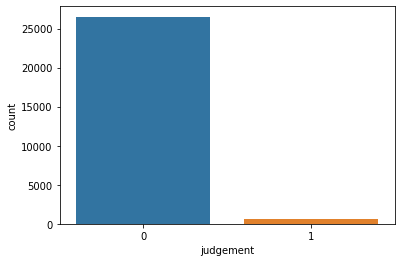

In [ ]:
import seaborn as sns

sns.countplot(df_train['judgement'])

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/input/test.csv')
df_test.head()

,id,title,abstract
0,27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...
1,27146,Leukoerythroblastic reaction in a patient with...,NaN
2,27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...
3,27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...
4,27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...


In [ ]:
df_test.isnull().sum()

id             0
title          0
abstract    6546
dtype: int64

In [ ]:
train_abstract_len = df_train['abstract'].str.len()
train_title_len = df_train['title'].str.len()
test_abstract_len = df_test['abstract'].str.len()
test_title_len = df_test['title'].str.len()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Text(0, 0.5, 'word count')

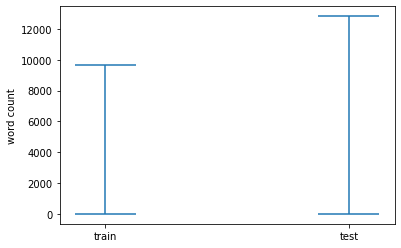

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.violinplot([train_abstract_len,test_abstract_len])
ax.set_xticks([1,2])
ax.set_xticklabels(['train','test'])
ax.set_ylabel('word count')

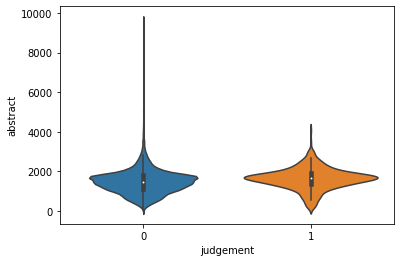

In [ ]:
  sns.violinplot(x=df_train['judgement'],y=train_abstract_len,data=df_train)
  plt.show()


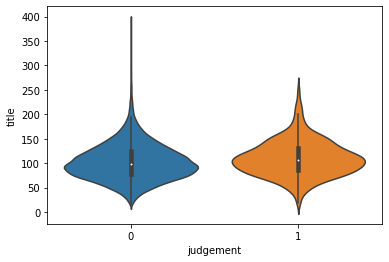

In [ ]:
sns.violinplot(x=df_train['judgement'],y=train_title_len,data=df_train)
plt.show()

In [ ]:
combined = df_train.append(df_test,ignore_index=True,sort=True)

In [ ]:
import re
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def cleaning(texts):
  clean_texts = []
  for text in texts:
    #アルファベット以外をスペースに置き換え
    clean_punc = re.sub(r'[^a-zA-Z]',' ',text)
    #単語長2文字以下のものは削除
    clean_short_tokenized = [word for word in clean_punc.split() if len(word)>2]
    #ステミング
    clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]

    #単語同士をスペースでつなぎ文章に
    clean_text = ' '.join(clean_normalize)
    clean_texts.append(clean_text)

  return clean_texts

In [ ]:
combined_cleaned = combined.copy()
combined_cleaned['abstract'].fillna('missing',inplace=True)

In [ ]:
combined_cleaned['abstract'] = cleaning(combined_cleaned['abstract'])
combined_cleaned['title'] = cleaning(combined['title'])

In [ ]:
print('original\n',combined['abstract'][0])
print('%'*10)
print('cleaning\n',combined_cleaned['abstract'][0])

original
 Longitudinal studies indicate that declines in cognition and memory accelerate after age 70 years. The neuroanatomic and neurophysiologic underpinnings of cognitive change are unclear  as there is little information on longitudinal brain changes. We are conducting a longitudinal neuroimaging study of nondemented older participants in the Baltimore Longitudinal Study of Aging. This report focuses on age and sex differences in brain structure measured by magnetic resonance imaging during the first two annual evaluations. Cross-sectional results from 116 participants aged 59-85 years reveal significantly larger ventricular volumes and smaller gray and white matter volumes in older compared with younger participants and in men compared with women. Regional brain volumes show that the effects of age and sex are not uniform across brain regions. Age differences are greatest for the parietal region. Sex differences tend to be larger for frontal and temporal than parietal and occipit

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90,min_df=3,max_features=3000,stop_words='english')
bow_abstract = bow_vectorizer.fit_transform(combined_cleaned['abstract'])
bow_title = bow_vectorizer.fit_transform(combined_cleaned['title'])
print(bow_abstract.shape)
print(bow_title.shape)

(67979, 3000)
(67979, 3000)


In [123]:
from sklearn.model_selection import train_test_split

delimit_num = df_train.shape[0]
train_bow_abstract = bow_abstract[:delimit_num,:]
train_bow_title = bow_title[:delimit_num,:]
test_bow_abstract = bow_abstract[delimit_num:,:]
test_bow_title = bow_title[delimit_num:,:]

x_bow_train,x_bow_valid,y_bow_train,y_bow_valid = train_test_split(train_bow_title,df_train['judgement'],test_size=0.3,random_state=0)

In [124]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=6,n_estimators=1000,n_jobs=-1)
model.fit(x_bow_train,y_bow_train)
pred = model.predict(x_bow_valid)

In [125]:
from sklearn.metrics import fbeta_score

score = fbeta_score(y_bow_valid,pred,beta=7.0)

In [126]:
print(score)

0.4195569478630566


In [ ]:
model.fit(train_bow,df_train['judgement'])
prediction_sub = model.predict(test_bow)

In [ ]:
sample_submit_df = pd.DataFrame([df_test['id'], prediction_sub]).T
sample_submit_df.to_csv('/content/drive/MyDrive/機械学習/Competitions/Signate/医学論文の自動仕分けチャレンジ/output/sample_submit(tutorial).csv', header=None, index=None)

In [ ]:
sample_submit_df.head()

,id,Unnamed 0
0,27145,0
1,27146,0
2,27147,0
3,27148,0
4,27149,0


In [ ]:
sample_submition.head()

,0,1
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1


In [ ]:
sample_submit_df['Unnamed 0'].value_counts()

0    40296
1      538
Name: Unnamed 0, dtype: int64

In [ ]:
print(bow_abstract)

  (0, 1552)	6
  (0, 2621)	3
  (0, 1347)	1
  (0, 666)	1
  (0, 470)	2
  (0, 1638)	1
  (0, 18)	1
  (0, 78)	6
  (0, 2993)	3
  (0, 404)	5
  (0, 2850)	1
  (0, 1536)	1
  (0, 1366)	1
  (0, 328)	7
  (0, 531)	1
  (0, 1804)	1
  (0, 1829)	1
  (0, 1879)	2
  (0, 1948)	3
  (0, 2742)	1
  (0, 2315)	1
  (0, 1065)	1
  (0, 2463)	3
  (0, 737)	3
  (0, 2619)	1
  :	:
  (67978, 2165)	1
  (67978, 1373)	1
  (67978, 1067)	5
  (67978, 2475)	1
  (67978, 535)	1
  (67978, 2660)	2
  (67978, 28)	1
  (67978, 2492)	2
  (67978, 522)	1
  (67978, 27)	3
  (67978, 2960)	1
  (67978, 1161)	1
  (67978, 2229)	1
  (67978, 2017)	2
  (67978, 521)	4
  (67978, 2551)	10
  (67978, 2273)	2
  (67978, 2301)	1
  (67978, 2924)	1
  (67978, 1607)	1
  (67978, 2311)	1
  (67978, 1144)	1
  (67978, 217)	1
  (67978, 2732)	1
  (67978, 1331)	1


In [ ]:
print(bow_title)

  (0, 2990)	1
  (0, 71)	1
  (0, 422)	1
  (0, 1719)	1
  (0, 335)	1
  (0, 2935)	1
  (0, 1871)	1
  (0, 62)	1
  (1, 71)	1
  (1, 2652)	1
  (1, 630)	1
  (1, 311)	1
  (1, 941)	1
  (1, 891)	1
  (1, 1754)	1
  (1, 1356)	1
  (1, 97)	2
  (1, 210)	1
  (1, 622)	1
  (1, 727)	1
  (1, 2840)	1
  (1, 693)	1
  (1, 2620)	1
  (1, 2544)	1
  (1, 1314)	1
  :	:
  (67975, 2764)	1
  (67975, 144)	1
  (67976, 2833)	1
  (67976, 1278)	1
  (67976, 1087)	1
  (67976, 1762)	1
  (67976, 2883)	1
  (67976, 2072)	1
  (67976, 866)	1
  (67976, 2768)	1
  (67976, 1171)	1
  (67977, 1278)	1
  (67977, 838)	1
  (67977, 2926)	1
  (67978, 335)	1
  (67978, 2833)	1
  (67978, 939)	1
  (67978, 2508)	1
  (67978, 2732)	1
  (67978, 2163)	1
  (67978, 866)	1
  (67978, 2768)	1
  (67978, 350)	1
  (67978, 2016)	1
  (67978, 542)	1
